<a href="https://colab.research.google.com/github/Tirth2004-git/OIBSIP/blob/main/Car_Price_Predication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score , root_mean_squared_error , mean_absolute_error , accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Tirth2004-git/OIBSIP/main/Task_3/car%20data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.shape

(301, 9)

In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

<Axes: >

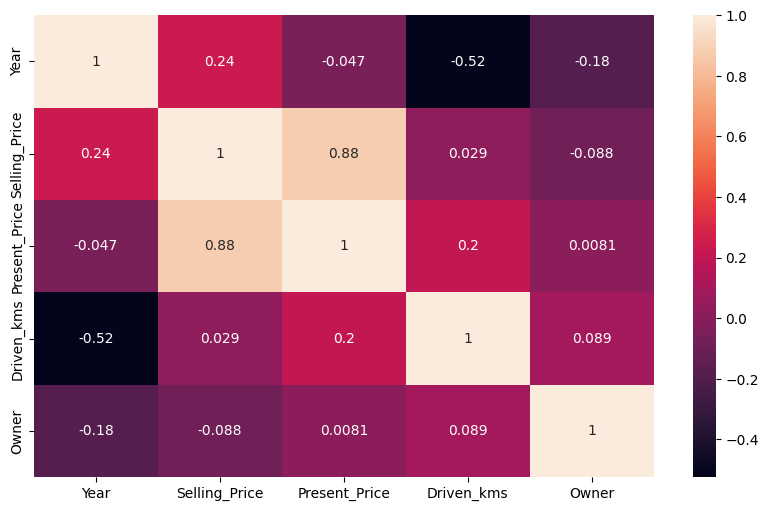

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)


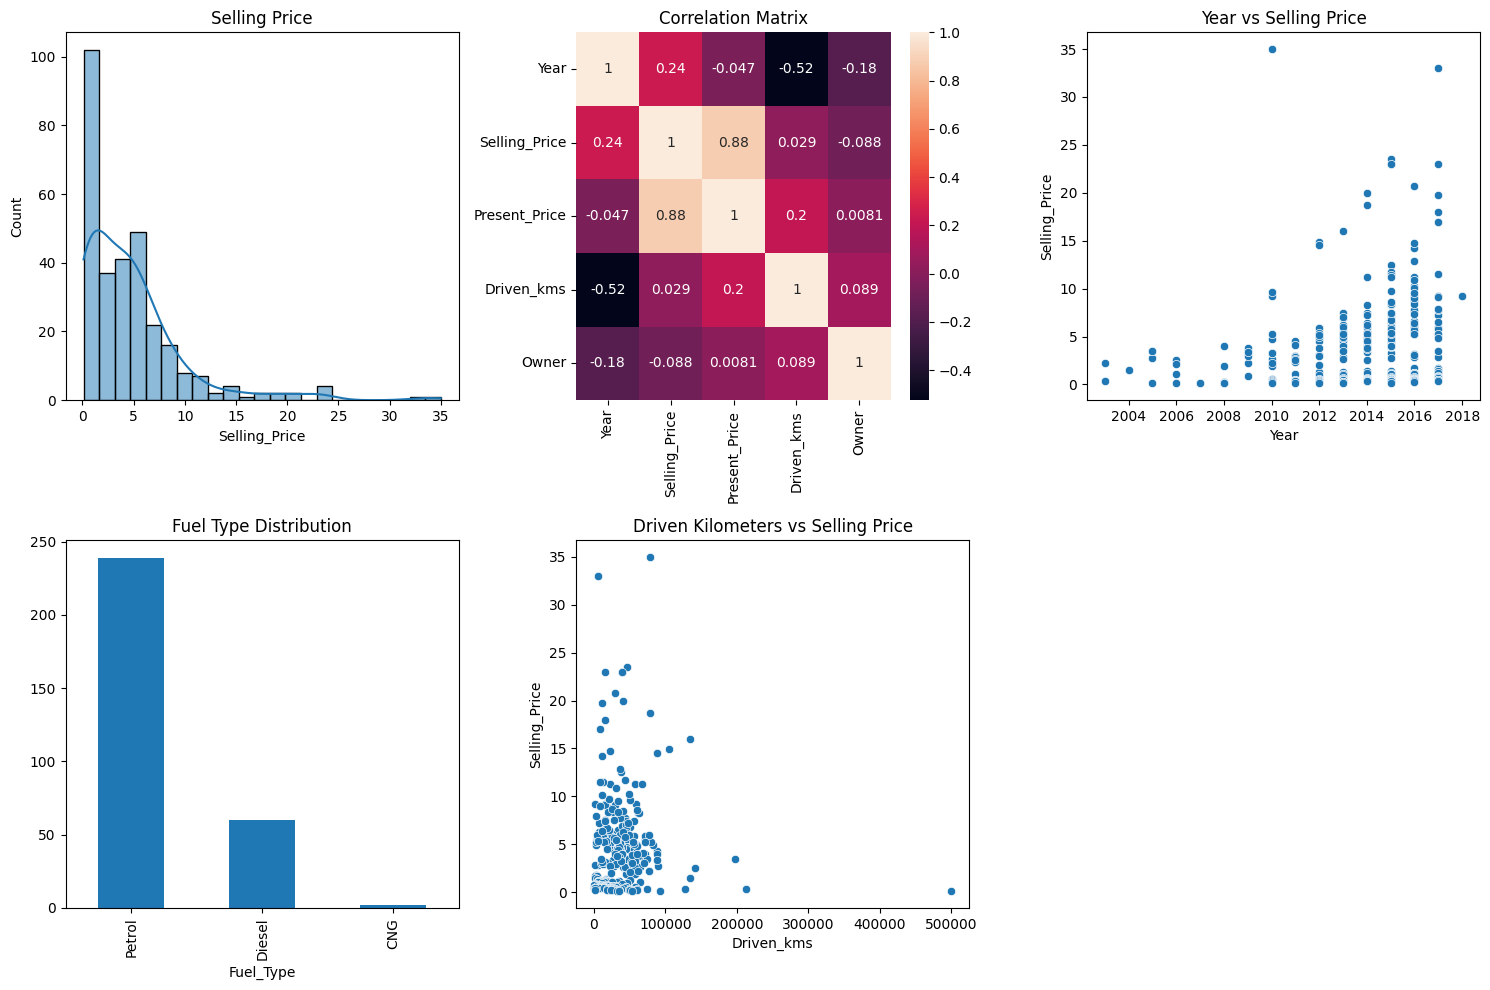

In [7]:
plt.figure(figsize=(15,10))

# Distribution of selling Price
plt.subplot(2,3,1)
sns.histplot(df['Selling_Price'] , kde=True)
plt.title('Selling Price')


# Correlation heatmap
plt.subplot(2,3,2)
numerical_col = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms','Owner']
corr_matrix = df[numerical_col].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')


# year vs selling Price
plt.subplot(2,3,3)
sns.scatterplot(x = 'Year' , y='Selling_Price', data=df)
plt.title('Year vs Selling Price')

# Fuel type Distribution
plt.subplot(2,3,4)
df['Fuel_Type'].value_counts().plot(kind='bar')
plt.title('Fuel Type Distribution')


# Driven_kms vs selling_price
plt.subplot(2,3,5)
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=df)
plt.title('Driven Kilometers vs Selling Price')

plt.tight_layout()
plt.show()


In [8]:
# Data Preprocessing
# Create a copy for preprocessing
df_processed = df.copy()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
label_encodes = {}
categorical_col = ['Fuel_Type', 'Selling_type', 'Transmission']

for col in categorical_col:
    le =  LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encodes[col] = le


In [11]:
df_processed = df_processed.drop(['Car_Name' , 'Year'] , axis=1)

In [12]:
x =df_processed.drop('Selling_Price' , axis=1)
y = df_processed['Selling_Price']

In [13]:
x_train , x_test , y_train , y_test = train_test_split(x , y  ,test_size=0.2 , random_state=42)

In [14]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

len(x_test_scaled) , len(x_train_scaled)

(61, 240)

In [15]:
model = {
    'RandomForestRegressor' : RandomForestRegressor(n_estimators=100 , random_state=42),
    'LinearRegression' : LinearRegression()
}

result={}

for name , model in model.items():
  model.fit(x_train , y_train)
  y_pred = model.predict(x_test)

  # calculate metrics

  mse = mean_squared_error(y_test , y_pred)
  mae = mean_absolute_error(y_test , y_pred)
  rmse = root_mean_squared_error(y_test , y_pred)
  r2 = r2_score(y_test , y_pred)

  cv_scores = cross_val_score(model , x_train_scaled , y_train , cv=5 , scoring='r2')

  result[name] = {
      'model' : model ,
      "mae" : mae ,
      "mse" : mse ,
      "rmse" : rmse ,
      "cv_mean":cv_scores.mean(),
      "cv_std":cv_scores.std(),
      "r2":r2
  }
  print('-'*50)
  print(f'{name} : result :')
  print('-'*50)
  print(f'RMSE : {rmse:.3f}')
  print(f"R2 score : {r2:.3f}")
  print(f"Cross-validation R2: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")
  print(f"Accurancy-score : {model.score(x_test , y_test)*100:.3f} %")
  print('-'*50)
  print()


--------------------------------------------------
RandomForestRegressor : result :
--------------------------------------------------
RMSE : 1.312
R2 score : 0.925
Cross-validation R2: 0.845 ± 0.042
Accurancy-score : 92.529 %
--------------------------------------------------

--------------------------------------------------
LinearRegression : result :
--------------------------------------------------
RMSE : 2.286
R2 score : 0.773
Cross-validation R2: 0.793 ± 0.041
Accurancy-score : 77.315 %
--------------------------------------------------



Text(0, 0.5, 'Predicted Selling Price')

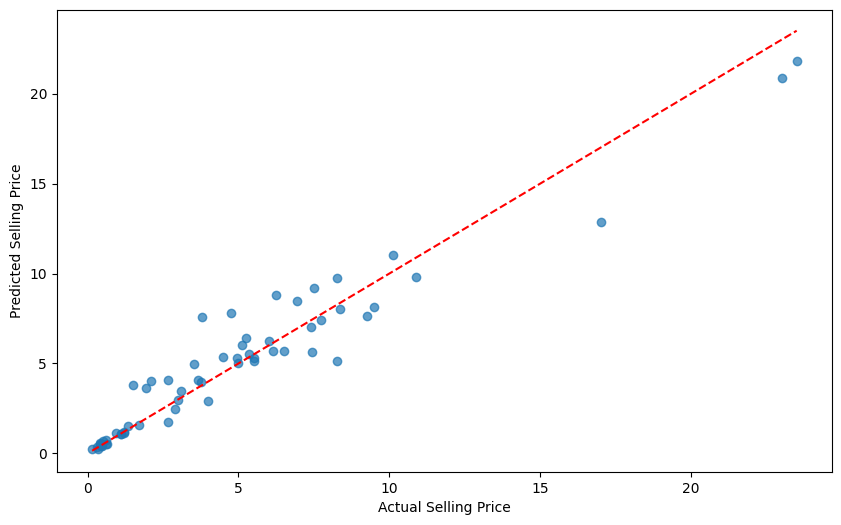

In [16]:
best_model = result['RandomForestRegressor']['model']

y_pred_best = best_model.predict(x_test)

plt.figure(figsize=(10,6))
plt.scatter(x=y_test , y=y_pred_best , alpha=0.7)
plt.plot([y_test.min() , y_test.max()] , [y_test.min() , y_test.max()] , 'r--')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')


# **End**